# Lead Scoring Case Study

# Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

### Data

We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. We can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that we also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

 

### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Filtering out the warnings
import warnings
warnings.filterwarnings("ignore")

# For all the columns and rows printed properly
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

In [2]:
#Reading csv file using read_csv
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Check the number of rows and columns in the dataframe
df.shape

(9240, 37)

In [4]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Check the summary for the numeric columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [6]:
#Checking total columns in the dataframe
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Step 2: Data Quality Check 

In [7]:
#Checking duplicates in prospect ID
sum(df.duplicated(subset="Prospect ID"))==0    # No duplicates

True

In [8]:
#checking duplicates in Lead Number
sum(df.duplicated(subset="Lead Number"))==0   # No duplicates

True

##### Insight: Looking at data dictionary,we can drop these columns:
- "Prospect ID" is a unique ID with the customer is identified, which is not significant for further analysis
- "Lead Number" is a lead number assigned to each lead procured.

In [9]:
# Remove unwanted columns 
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

#### Checking Missing Values

In [10]:
# checking missing value percentage wise in each column
print((df.isnull().sum().sort_values(ascending=False) * 100/df.shape[0]).round(2))

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [11]:
# Removing columns in which percentage of missing value is greater than 35%
df=df.loc[:,df.isnull().mean()<=0.35]

# checking rows and columns
df.shape

(9240, 29)

In [12]:
# checking missing value percentage wise in each column
print((df.isnull().sum().sort_values(ascending=False) * 100/df.shape[0]).round(2))

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine  

##### Insight: Looking at data dictionary,we can drop these columns:
- "Country" is the country of the customer, which is not significant for further analysis
- "City" is the city of the customer.

In [13]:
# Removing Country and City columns
df.drop(['Country','City'],axis=1,inplace=True)

In [14]:
# Checking each columns categories counts
for c in df.columns:
    print(df[c].astype("category").value_counts(dropna=False))

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0      2189
2.0      1680
3.0      1306

In [15]:
# After analysis of each variable value counts we can see that there is no variations so drop them out
#filtering out unwanted columns from the dataframe for further analysis
df=df.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [16]:
# checking missing value percentage wise in each column
print((df.isnull().sum().sort_values(ascending=False) * 100/df.shape[0]).round(2))

Lead Profile                              29.32
What is your current occupation           29.11
How did you hear about X Education        23.89
Specialization                            15.56
Page Views Per Visit                       1.48
TotalVisits                                1.48
Last Activity                              1.11
Lead Source                                0.39
Last Notable Activity                      0.00
A free copy of Mastering The Interview     0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Do Not Email                               0.00
Lead Origin                                0.00
dtype: float64


#### Checking Occupation column

In [17]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

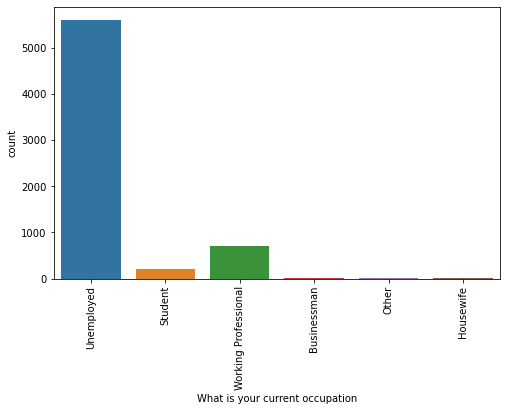

In [18]:
plt.figure(figsize=[8,5]),
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()


Insight: We can see that there are 2690 NaN values, we can't impute this huge value with other value, so we need to remove null values

In [19]:
df=df[~df['What is your current occupation'].isnull()]

In [20]:
# checking missing value percentage wise in each column
print((df.isnull().sum().sort_values(ascending=False) * 100/df.shape[0]).round(2))

Page Views Per Visit                      1.98
TotalVisits                               1.98
Last Activity                             1.57
Lead Source                               0.55
Lead Profile                              0.29
How did you hear about X Education        0.29
Specialization                            0.27
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
What is your current occupation           0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Email                              0.00
Lead Origin                               0.00
dtype: float64


Insight: There are very less missing values so we can simply remove it 

In [21]:
df=df[~df['TotalVisits'].isnull()]

In [22]:
df=df[~df['Lead Source'].isnull()]

In [23]:
df=df[~df['How did you hear about X Education'].isnull()]

In [24]:
# checking missing value percentage wise in each column
print((df.isnull().sum().sort_values(ascending=False) * 100/df.shape[0]).round(2))

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
Lead Profile                              0.0
What is your current occupation           0.0
How did you hear about X Education        0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
dtype: float64


### Data Imbalance

#### Data Imbalance in Converted variable

In [25]:
#Checking Imbalance in dataframe from different aspects
df.Converted.value_counts(normalize=True)*100

0    51.898933
1    48.101067
Name: Converted, dtype: float64

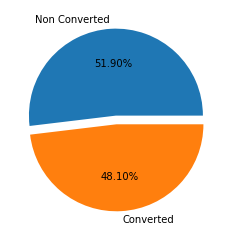

In [26]:
plt.pie(df.Converted.value_counts(normalize=True),explode=(0,0.1),labels=["Non Converted","Converted"],autopct="%1.2f%%")
plt.show()

In [27]:
#Conversion Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

48.10106716886378

# Step 3: Visualising the Data

#### Univariate  Analysis

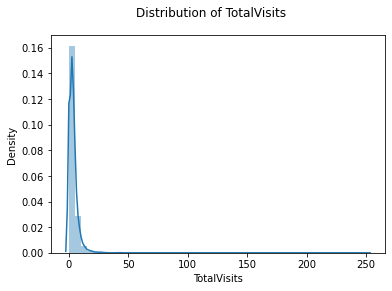

In [28]:
plt.suptitle("Distribution of TotalVisits ")
sns.distplot(df['TotalVisits'])
plt.show()

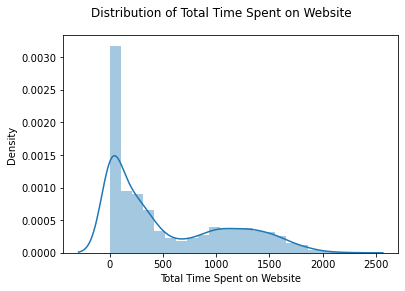

In [29]:
plt.suptitle("Distribution of Total Time Spent on Website  ")
sns.distplot(df['Total Time Spent on Website'])
plt.show()

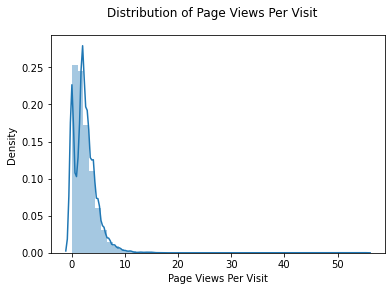

In [30]:
plt.suptitle("Distribution of Page Views Per Visit")
sns.distplot(df['Page Views Per Visit'])
plt.show()

#### Bivariate Analysis

#### Lead Source

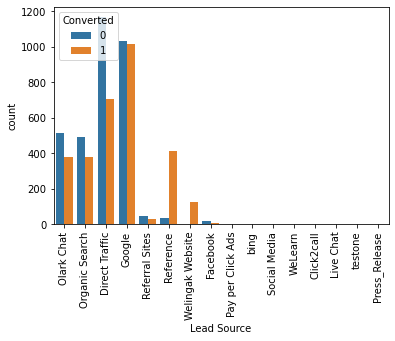

In [31]:
sns.countplot(x = 'Lead Source', hue = 'Converted', data =df)
plt.xticks(rotation=90)
plt.show()

Insights- We can see that the origin identifier with which the customer was identified for conversion is Google and Direct traffic.

#### Do Not Email

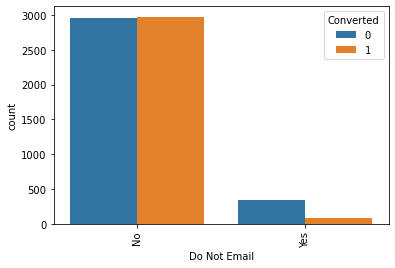

In [32]:
sns.countplot(x = 'Do Not Email', hue = 'Converted', data =df)
plt.xticks(rotation=90)
plt.show()

Insights-We can say that maximum customer do not want email about the course.

#### Last Activity

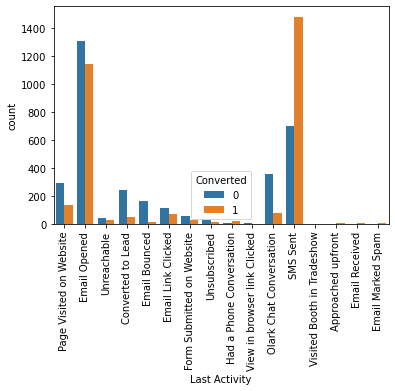

In [33]:
sns.countplot(x = 'Last Activity', hue = 'Converted', data =df)
plt.xticks(rotation=90)
plt.show()

Insights- From above we can see that Last activity performed by the customer for conversion is maximum "SMS Sent" and "Email Opened".

#### Specialization

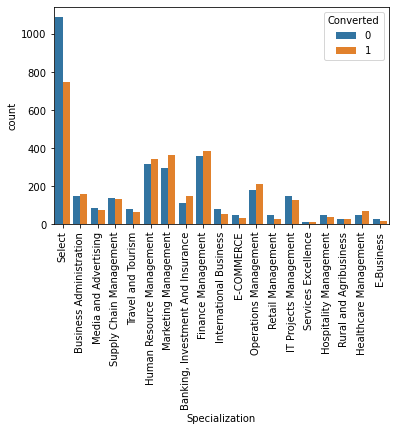

In [34]:
sns.countplot(x = 'Specialization', hue = 'Converted', data =df)
plt.xticks(rotation=90)
plt.show()

Insights- From above we can see that the industry domain in which the customer worked before conversion and non conversion are most "Finance Management","Marketing Management" and "Travel and Tourism".Here 'Select Specialization' means the customer had not selected this option while filling the form.

#### How did you hear about X Education

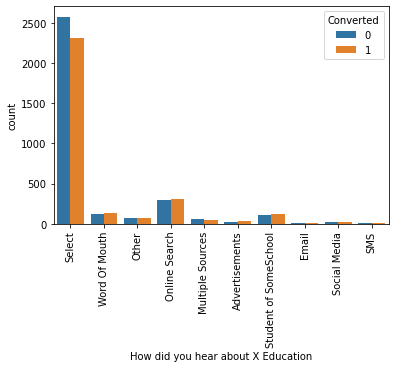

In [35]:
sns.countplot(x = 'How did you hear about X Education', hue = 'Converted', data =df)
plt.xticks(rotation=90)
plt.show()

Insight- We can say that the source from which the customer heard about X Education are mostly from online search.Here "Select" means the customer had not selected this option while filling the form. 

#### What is your current occupation

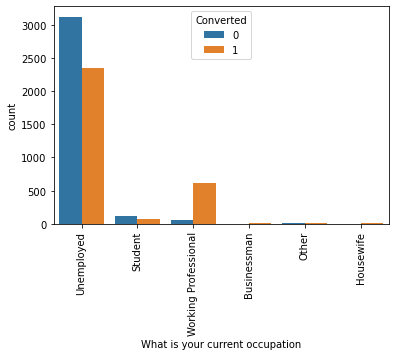

In [36]:
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data =df)
plt.xticks(rotation=90)
plt.show()

Insjghts- From above depicts that most of the customers are unemployed and students,housewife are very less.

#### Lead Profile

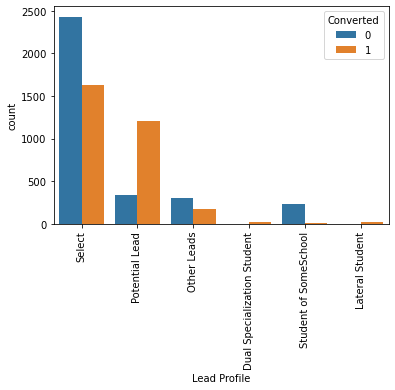

In [37]:
sns.countplot(x = 'Lead Profile', hue = 'Converted', data =df)
plt.xticks(rotation=90)
plt.show()

Insights- From above observation mostly potential lead level assigned to each customer based on their profile.

#### Last Notable Activity

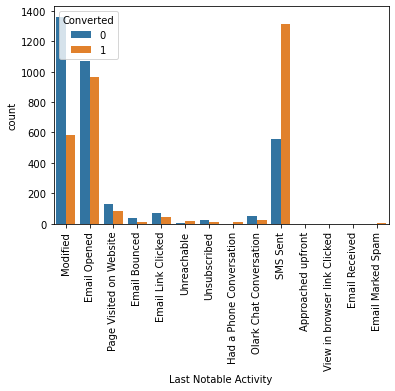

In [38]:
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data =df)
plt.xticks(rotation=90)
plt.show()

Insights- The last notable acitivity performed by the student for conversion are "SMS sent" and "Email opened"

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

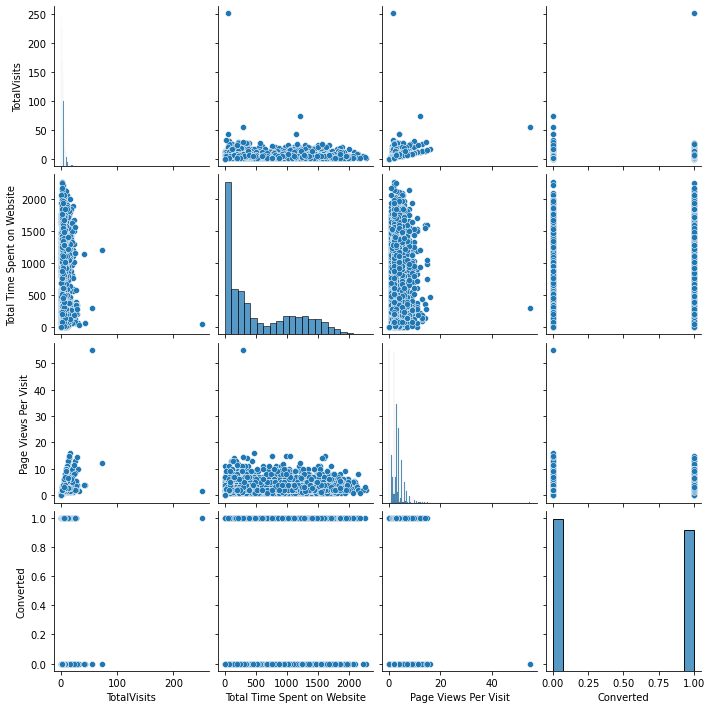

In [39]:
# Pairplot for continuous variables
sns.pairplot(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']])
plt.show()

In [40]:
cor=df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']].corr()
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False

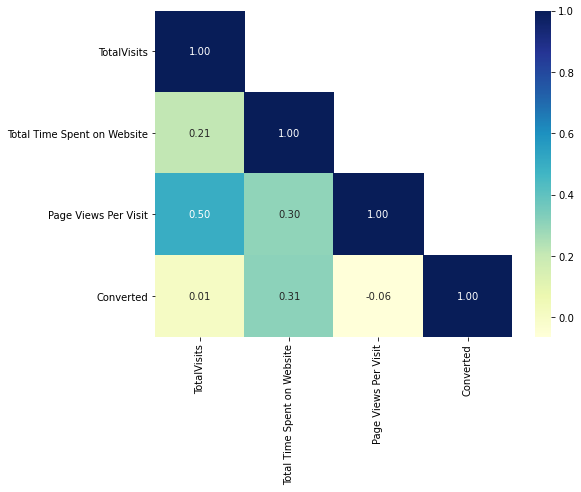

In [41]:
# Heatmap to see correlation between continuous variables
plt.figure(figsize=[8,6])
sns.heatmap(cor,mask=mask, cmap="YlGnBu", annot = True,fmt='.2f')
plt.show()

There is negative correlation between "Page Views per visit" and "Converted"

# Step 4: Data Preparation

#### Converting binary variable (yes/no) to (1/0)

In [42]:
df['Do Not Email']=df['Do Not Email'].map({"Yes":1,"No":0})
df['A free copy of Mastering The Interview']=df['A free copy of Mastering The Interview'].map({"Yes":1,"No":0})

In [43]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Potential Lead,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Select,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Select,0,Modified


#### Dummy Variables

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [44]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1=pd.get_dummies(df[['Lead Origin', 'Lead Source','Last Activity', 'What is your current occupation','Last Notable Activity']],drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Some of variable have "Select" category which means the customer had not selected this option while filling the form.So there is no use to analyse "select",need to remove it.

In [45]:
# Creating a dummy variable for some of the categorical variables 
dummy2=pd.get_dummies(df['Specialization'],prefix='Specialization')
dummy2=dummy2.drop(["Specialization_Select"],1)
dummy2.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
dummy3=pd.get_dummies(df['How did you hear about X Education'],prefix='How did you hear about X Education')
dummy3=dummy3.drop(["How did you hear about X Education_Select"],1)
dummy3.head()

,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0


In [47]:
dummy4=pd.get_dummies(df['Lead Profile'],prefix='Lead Profile')
dummy4=dummy4.drop(["Lead Profile_Select"],1)

In [48]:
# Adding the results to the master dataframe
df=pd.concat([df,dummy1,dummy2,dummy3,dummy4],axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Potential Lead,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Dropping the repeated variables

In [49]:
# We have created dummies for the below variables, so we can drop them
df.drop(['Lead Origin', 'Lead Source','Last Activity', 'Last Notable Activity','Specialization','How did you hear about X Education','Lead Profile','What is your current occupation'],axis=1,inplace=True)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for logistic regression is performing a train-test split.

In [50]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

In [51]:
y=df.pop("Converted")
X=df

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=100)

#### Rescaling the Features 

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [54]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var_list=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[var_list]=scaler.fit_transform(X_train[var_list])

In [55]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
4170,0,0.015936,0.408891,0.2500,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6812,0,0.063745,0.539613,0.1250,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7717,0,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,0,0.019920,0.157570,0.3125,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2044,0,0.007968,0.163292,0.1250,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Step 6: Building our model

#### Running  First Training Model
#### Model 1

In [56]:
import statsmodels.api as sm

In [57]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4374
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 08 Sep 2021   Deviance:                          nan
Time:                        15:19:41   Pearson chi2:                 6.00e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                    -9.328e+14   8.47e+07   -1.1e+07      0.000   -9.33e+14   -9.33e+14
Do Not Email                                             -7.456e+14    5.5e+06  -1.36e+08      0.000   -7.46e+14   -7.46e+14
TotalVisits                                               5.246e+15   5.65e+07   9.29e+07      0.000    5.25e+15    5.25e+15
Total Time Spent on Website                               3.121e+15   4.74e+06   6.59e+08      0.000    3.12e+15    3.12e+15
Page Views Per Visit                                     -1.124e+15   1.14e+07  -9.89e+07      0.000   -1.12e+15   -1.12e+15
A free copy of Mastering The Interview                   -1.701e+14   3.77e+06  -4.51e+07      0.000    -1.7e+14    -1.7e+14
Lead Origin_Landing Page Submission                      -2.132e+14    4.5e+06  -4.73e+07      0.000   -2.13e+14   -2.13e+14
Lead Origin_Lead Add Form                                -1.733e+14   3.94e+07   -4.4e+06      0.000   -1.73e+14   -1.73e+14
Lead Origin_Lead Import                                   5.473e+15   6.98e+07   7.84e+07      0.000    5.47e+15    5.47e+15
Lead Source_Direct Traffic                                2.259e+15   7.81e+07   2.89e+07      0.000    2.26e+15    2.26e+15
Lead Source_Facebook                                     -2.727e+15   1.03e+08  -2.64e+07      0.000   -2.73e+15   -2.73e+15
Lead Source_Google                                        2.565e+15   7.81e+07   3.29e+07      0.000    2.57e+15    2.57e+15
Lead Source_Live Chat                                     6.211e+15   8.25e+07   7.53e+07      0.000    6.21e+15    6.21e+15
Lead Source_Olark Chat                                    3.331e+15    7.8e+07   4.27e+07      0.000    3.33e+15    3.33e+15
Lead Source_Organic Search                                2.436e+15   7.81e+07   3.12e+07      0.000    2.44e+15    2.44e+15
Lead Source_Pay per Click Ads                            -3.002e+15   1.03e+08  -2.91e+07      0.000      -3e+15      -3e+15
Lead Source_Press_Release                                 6.514e+14   1.04e+08   6.28e+06      0.000    6.51e+14    6.51e+14
Lead Source_Reference                                     4.597e+15   6.74e+07   6.82e+07      0.000     4.6e+15     4.6e+15
Lead Source_Referral Sites                                2.483e+15   7.87e+07   3.16e+07      0.000    2.48e+15    2.48e+15
Lead Source_Social Media                                 -1.498e+15   1.03e+08  -1.45e+07      0.000    -1.5e+15    -1.5e+15
Lead Source_WeLearn                                       6.374e+15   1.03e+08   6.18e+07      0.000    6.37e+15    6.37e+15
Lead Source_Welingak Website                              3.616e+15   6.77e+07   5.

We will be use **LogisticRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

## Step 7:  Feature Selection Using RFE 
Recursive feature elimination

In [58]:
# Importing RFE and logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [59]:
# Running RFE with the output number of the variable equal to 15
logreg=LogisticRegression()

rfe=RFE(logreg,15)       # running RFE
rfe=rfe.fit(X_train,y_train)

In [60]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 64),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 71),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Live Chat', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 44),
 ('Lead Source_Press_Release', False, 73),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 66),
 ('Lead Source_WeLearn', False, 68),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 62),
 ('Lead Source_testone', False, 29),
 ('Last Activity_Converted to Lead', False, 15),
 ('Last Activity_Em

In [61]:
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_testone',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsu

#### Building model using statsmodel, for the detailed statistics

#### Model 2

In [63]:
import statsmodels.api as sm

# Adding a constant variable 
X_train_sm=sm.add_constant(X_train[col])

# Create a second fitted model
logreg2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logreg2.fit()
# Check the parameters obtained
res.params

const                                             -0.395891
Do Not Email                                      -1.280331
TotalVisits                                       10.611782
Total Time Spent on Website                        4.419067
Lead Origin_Lead Add Form                          3.358705
Lead Source_Olark Chat                             1.642090
Lead Source_Welingak Website                       3.127376
Last Activity_SMS Sent                             1.190713
What is your current occupation_Student           -1.662582
What is your current occupation_Unemployed        -2.247406
Last Notable Activity_Had a Phone Conversation    24.810173
Last Notable Activity_Unreachable                  2.626869
Lead Profile_Dual Specialization Student          24.466852
Lead Profile_Lateral Student                      24.369411
Lead Profile_Potential Lead                        1.466511
Lead Profile_Student of SomeSchool                -3.153319
dtype: float64

In [64]:
# Print a summary of the logistic regression model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1921.1
Date:                Wed, 08 Sep 2021   Deviance:                       3842.1
Time:                        15:19:54   Pearson chi2:                 4.55e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [65]:
# Calculate the VIFs for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.93
2,Total Time Spent on Website,2.16
3,Lead Origin_Lead Add Form,1.66
1,TotalVisits,1.59
6,Last Activity_SMS Sent,1.53
13,Lead Profile_Potential Lead,1.46
4,Lead Source_Olark Chat,1.35
5,Lead Source_Welingak Website,1.35
7,What is your current occupation_Student,1.21
14,Lead Profile_Student of SomeSchool,1.19


P-value of 'Last Notable Activity_Had a Phone Conversation' variable is very high, we should drop it

In [66]:
# droping column with high p-value
col1 = col.drop('Last Notable Activity_Had a Phone Conversation',1)

#### Model 3

In [67]:
# Adding a constant variable 
X_train_sm=sm.add_constant(X_train[col1])

# Create a second fitted model
logreg3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logreg3.fit()
# Check the parameters obtained
res.params

const                                         -0.388175
Do Not Email                                  -1.288115
TotalVisits                                   11.105729
Total Time Spent on Website                    4.397026
Lead Origin_Lead Add Form                      3.350123
Lead Source_Olark Chat                         1.634410
Lead Source_Welingak Website                   3.131728
Last Activity_SMS Sent                         1.179207
What is your current occupation_Student       -1.670680
What is your current occupation_Unemployed    -2.245045
Last Notable Activity_Unreachable              2.609564
Lead Profile_Dual Specialization Student      23.466524
Lead Profile_Lateral Student                  23.361308
Lead Profile_Potential Lead                    1.476825
Lead Profile_Student of SomeSchool            -3.152832
dtype: float64

In [68]:
# Print a summary of the logistic regression model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1929.7
Date:                Wed, 08 Sep 2021   Deviance:                       3859.3
Time:                        15:19:55   Pearson chi2:                 4.56e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [69]:
# Calculate the VIFs for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.93
2,Total Time Spent on Website,2.16
3,Lead Origin_Lead Add Form,1.66
1,TotalVisits,1.59
6,Last Activity_SMS Sent,1.53
12,Lead Profile_Potential Lead,1.46
4,Lead Source_Olark Chat,1.35
5,Lead Source_Welingak Website,1.35
7,What is your current occupation_Student,1.21
13,Lead Profile_Student of SomeSchool,1.19


P-value of 'Lead Profile_Dual Specialization Student' variable is very high, we should drop it

In [70]:
# droping column with high p-value
col2 = col1.drop('Lead Profile_Dual Specialization Student',1)

#### Model 4

In [71]:
# Adding a constant variable 
X_train_sm=sm.add_constant(X_train[col2])

# Create a second fitted model
logreg4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logreg4.fit()
# Check the parameters obtained
res.params

const                                         -0.370934
Do Not Email                                  -1.266259
TotalVisits                                   11.025617
Total Time Spent on Website                    4.413949
Lead Origin_Lead Add Form                      3.344245
Lead Source_Olark Chat                         1.638226
Lead Source_Welingak Website                   3.128911
Last Activity_SMS Sent                         1.175097
What is your current occupation_Student       -1.625236
What is your current occupation_Unemployed    -2.254290
Last Notable Activity_Unreachable              2.602695
Lead Profile_Lateral Student                  23.347258
Lead Profile_Potential Lead                    1.463942
Lead Profile_Student of SomeSchool            -3.191150
dtype: float64

In [72]:
# Print a summary of the logistic regression model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1939.2
Date:                Wed, 08 Sep 2021   Deviance:                       3878.4
Time:                        15:19:56   Pearson chi2:                 4.58e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [73]:
# Calculate the VIFs for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.93
2,Total Time Spent on Website,2.15
3,Lead Origin_Lead Add Form,1.66
1,TotalVisits,1.59
6,Last Activity_SMS Sent,1.53
11,Lead Profile_Potential Lead,1.46
4,Lead Source_Olark Chat,1.35
5,Lead Source_Welingak Website,1.35
7,What is your current occupation_Student,1.21
12,Lead Profile_Student of SomeSchool,1.19


P-value of 'Lead Profile_Lateral Student' variable is very high, we should drop it

In [74]:
# droping column with high p-value
col3= col2.drop('Lead Profile_Lateral Student',1)

#### Model 5 

In [75]:
# Adding a constant variable 
X_train_sm=sm.add_constant(X_train[col3])

# Create a second fitted model
logreg5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logreg5.fit()
# Check the parameters obtained
res.params

const                                         -0.352508
Do Not Email                                  -1.252814
TotalVisits                                   10.956908
Total Time Spent on Website                    4.425723
Lead Origin_Lead Add Form                      3.390157
Lead Source_Olark Chat                         1.631761
Lead Source_Welingak Website                   3.095184
Last Activity_SMS Sent                         1.164361
What is your current occupation_Student       -1.639962
What is your current occupation_Unemployed    -2.260380
Last Notable Activity_Unreachable              2.592620
Lead Profile_Potential Lead                    1.450031
Lead Profile_Student of SomeSchool            -3.200900
dtype: float64

In [76]:
# Print a summary of the logistic regression model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1947.5
Date:                Wed, 08 Sep 2021   Deviance:                       3895.0
Time:                        15:19:57   Pearson chi2:                 4.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [77]:
# Calculate the VIFs for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.93
2,Total Time Spent on Website,2.14
3,Lead Origin_Lead Add Form,1.65
1,TotalVisits,1.59
6,Last Activity_SMS Sent,1.53
10,Lead Profile_Potential Lead,1.46
4,Lead Source_Olark Chat,1.35
5,Lead Source_Welingak Website,1.35
7,What is your current occupation_Student,1.21
11,Lead Profile_Student of SomeSchool,1.19


In [78]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4170    0.630817
6812    0.616268
7717    0.272668
207     0.154824
2044    0.141499
3330    0.913687
6498    0.005029
2085    0.979617
6260    0.027609
19      0.091869
dtype: float64

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.63081689, 0.6162678 , 0.27266829, 0.15482351, 0.14149897,
       0.91368665, 0.00502891, 0.97961685, 0.0276092 , 0.09186854])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [80]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.630817,4170
1,1,0.616268,6812
2,1,0.272668,7717
3,0,0.154824,207
4,0,0.141499,2044


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [81]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.630817,4170,1
1,1,0.616268,6812,1
2,1,0.272668,7717,0
3,0,0.154824,207,0
4,0,0.141499,2044,0


In [82]:
from sklearn import metrics

In [83]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1910  409]
 [ 481 1660]]


In [84]:
# Predicted     not_converted    converted
# Actual
# not_converted        1910      409
# converted            481       1660

In [85]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8004484304932735

#### Model Evaluation

In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.775338626809902

In [88]:
# Let us calculate specificity
TN / float(TN+FP)

0.8236308753773178

In [89]:
# Calculate false postive rate - predicting converted when customer does not have not converted
FP/ float(TN+FP)

0.1763691246226822

In [90]:
# positive predictive value 
TP / float(TP+FP)

0.8023199613339778

In [91]:
# Negative predictive value
TN / float(TN+ FN)

0.7988289418653283

### Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

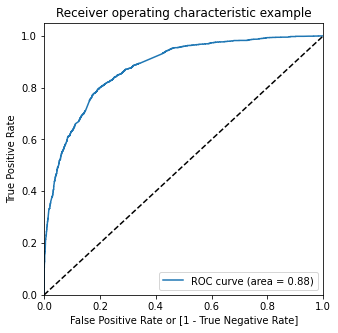

In [94]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The ROC curve should be value close to 1,we are getting 0.88 which mean good predication model

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [95]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.630817,4170,1,1,1,1,1,1,1,1,0,0,0
1,1,0.616268,6812,1,1,1,1,1,1,1,1,0,0,0
2,1,0.272668,7717,0,1,1,1,0,0,0,0,0,0,0
3,0,0.154824,207,0,1,1,0,0,0,0,0,0,0,0
4,0,0.141499,2044,0,1,1,0,0,0,0,0,0,0,0


In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    sensitivity= cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.480045     0.000000     1.000000
0.1          0.1  0.600448     0.243208     0.987389
0.2          0.2  0.724664     0.509271     0.957964
0.3          0.3  0.779596     0.690815     0.875759
0.4          0.4  0.795740     0.771022     0.822513
0.5          0.5  0.800448     0.823631     0.775339
0.6          0.6  0.779372     0.873221     0.677721
0.7          0.7  0.760090     0.922812     0.583839
0.8          0.8  0.728027     0.954291     0.482952
0.9          0.9  0.669955     0.981889     0.332088


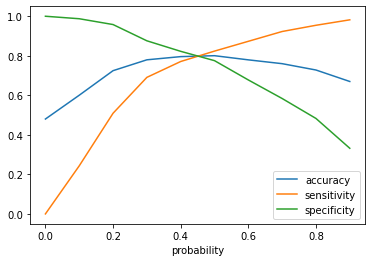

In [97]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.45 is the optimum point to take it as a cutoff probability.

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.630817,4170,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.616268,6812,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.272668,7717,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.154824,207,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.141499,2044,0,1,1,0,0,0,0,0,0,0,0,0


In [99]:
y_train_pred_final['Lead_score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_score']].head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_score
0,1,0.630817,4170,1,63
1,1,0.616268,6812,1,62
2,1,0.272668,7717,0,27
3,0,0.154824,207,0,15
4,0,0.141499,2044,0,14


In [100]:
# checking if 80% are correctly predicated based  on converted column
check_df=y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
check_df['final_predicted'].value_counts()

1    1711
0     430
Name: final_predicted, dtype: int64

In [101]:
# final_predicated conversion
print(1711/float(1711+430))

0.7991592713685194


In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8004484304932735

In [103]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1859,  460],
       [ 430, 1711]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7991592713685194

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.8016386373436826

In [107]:
# Calculate false postive rate - predicting converted when customer does not have converted
FP/ float(TN+FP)

0.19836136265631737

In [108]:
# Positive predictive value 
TP / float(TP+FP)

0.7881160755412252

In [109]:
# Negative predictive value
TN / float(TN+ FN)

0.8121450415028396

#### Precision and Recall

In [110]:
# Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1910,  409],
       [ 481, 1660]], dtype=int64)

##### Precision
TP / TP + FP

In [111]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8023199613339778

##### Recall
TP / TP + FN

In [112]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.775338626809902

Using sklearn utilities for the same

In [113]:
from sklearn.metrics import precision_score, recall_score

In [114]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8023199613339778

In [115]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.775338626809902

### Precision and recall tradeoff

In [116]:
from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 4455    0
 4456    0
 4457    0
 4458    0
 4459    1
 Name: Converted, Length: 4460, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 4455    0
 4456    1
 4457    0
 4458    0
 4459    0
 Name: predicted, Length: 4460, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

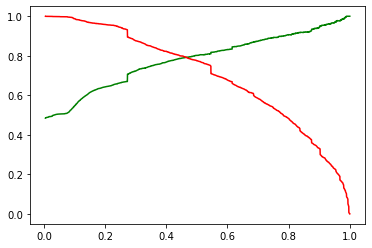

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 10: Making predictions on the test set

In [120]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var_list=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_test[var_list]=scaler.transform(X_test[var_list])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
8402,0,0.007968,0.621479,0.12500,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8782,0,0.019920,0.246039,0.31250,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6199,0,0.011952,0.414613,0.09375,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6482,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6026,0,0.000000,0.000000,0.00000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [121]:
X_test = X_test[col3]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
8402,0,0.007968,0.621479,0,0,0,0,0,1,0,0,0
8782,0,0.019920,0.246039,0,0,0,0,0,1,0,0,0
6199,0,0.011952,0.414613,0,0,0,1,0,1,0,0,0
6482,0,0.000000,0.000000,0,1,0,0,0,1,0,1,0
6026,0,0.000000,0.000000,1,0,0,0,0,1,0,0,0


In [122]:
X_test_sm = sm.add_constant(X_test)

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
8402,0,0.007968,0.621479,0,0,0,0,0,1,0,0,0
8782,0,0.019920,0.246039,0,0,0,0,0,1,0,0,0
6199,0,0.011952,0.414613,0,0,0,1,0,1,0,0,0
6482,0,0.000000,0.000000,0,1,0,0,0,1,0,1,0
6026,0,0.000000,0.000000,1,0,0,0,0,1,0,0,0


Making predictions on the test set

In [123]:
y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]

8402    0.555992
8782    0.213203
6199    0.626538
6482    0.615124
6026    0.685091
5991    0.593368
3812    0.294479
6307    0.109429
7344    0.643243
4171    0.321039
dtype: float64

In [124]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
8402,0.555992
8782,0.213203
6199,0.626538
6482,0.615124
6026,0.685091


In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [126]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,1,8402,0.555992
1,0,8782,0.213203
2,1,6199,0.626538
3,1,6482,0.615124
4,1,6026,0.685091


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [130]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final['Lead_score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [131]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_score
0,8402,1,0.555992,56
1,8782,0,0.213203,21
2,6199,1,0.626538,63
3,6482,1,0.615124,62
4,6026,1,0.685091,69


In [132]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.45 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_score,final_predicted
0,8402,1,0.555992,56,1
1,8782,0,0.213203,21,0
2,6199,1,0.626538,63,1
3,6482,1,0.615124,62,1
4,6026,1,0.685091,69,1


In [133]:
# checking if 80% are correctly predicated based  on converted column
check_df=y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
check_df['final_predicted'].value_counts()

1    740
0    184
Name: final_predicted, dtype: int64

In [134]:
# final_predicated conversion
print(740/float(740+184))

0.8008658008658008


In [135]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8017782426778243

In [136]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[793, 195],
       [184, 740]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8008658008658008

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.8026315789473685

#### Final Observations:

     - While we have checked both sensitivity- specificity and precision- recall metrics, we have considered optimal cutoff based on sensitivity- specificity for final predication. Accuracy,sensitivity,specificity values for test dataset are round 80.17%, 80.08%, 80.26% respectively
     - Lead score of train and test dataset shows conversion rate for final predicated model is 80%

The top three variables in model that contribute the most probability of a lead getting converted are

- TotalVisits
- Total Time spent on website
- Lead Origin_Lead Add Form.



The top 3 categorical/dummy variables in the model that increase the probability of lead conversion are

- Lead Origin_Lead Add Form
- Lead Source_Welingak website
- Lead Source_Olark Chat
